![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.19.0


# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Shapes of Imported Arrays

In [3]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### Plot an Image Example

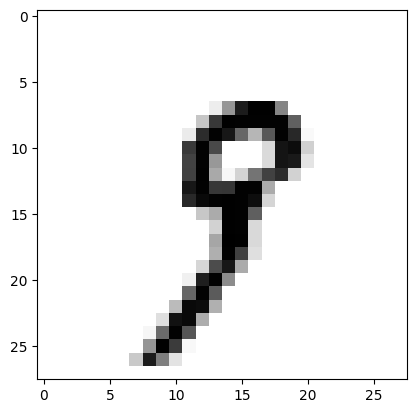

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[19], cmap='binary')
plt.show()

### Display Labels

In [5]:
y_train[19]

np.uint8(9)

In [6]:
print(set(y_train))  #to see the classes

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)

y_test_encoded=to_categorical(y_test)

### Validated Shapes

In [8]:
print('y_train_encoded shape:',y_train_encoded.shape)
print('y_test_encoded shape:',y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [9]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np
x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))
print('x_train_reshaped shape:',x_train_reshaped.shape)
print('x_test_reshaped shape:',x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [11]:
print(set(x_train_reshaped[0]))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(9), np.uint8(11), np.uint8(14), np.uint8(16), np.uint8(18), np.uint8(23), np.uint8(24), np.uint8(25), np.uint8(26), np.uint8(27), np.uint8(30), np.uint8(35), np.uint8(36), np.uint8(39), np.uint8(43), np.uint8(45), np.uint8(46), np.uint8(49), np.uint8(55), np.uint8(56), np.uint8(64), np.uint8(66), np.uint8(70), np.uint8(78), np.uint8(80), np.uint8(81), np.uint8(82), np.uint8(90), np.uint8(93), np.uint8(94), np.uint8(107), np.uint8(108), np.uint8(114), np.uint8(119), np.uint8(126), np.uint8(127), np.uint8(130), np.uint8(132), np.uint8(133), np.uint8(135), np.uint8(136), np.uint8(139), np.uint8(148), np.uint8(150), np.uint8(154), np.uint8(156), np.uint8(160), np.uint8(166), np.uint8(170), np.uint8(171), np.uint8(172), np.uint8(175), np.uint8(182), np.uint8(183), np.uint8(186), np.uint8(187), np.uint8(190), np.uint8(195), np.uint8(198), np.uint8(201), np.uint8(205), np.uint8(207), np.uint8(212), np.uint8(213), np.uint8(219), np.

### Data Normalization

In [12]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon=1e-10

x_train_norm=(x_train_reshaped-x_mean)/(x_std + epsilon)  #a very small value of standard deviation leads to unstablility in computations so we add another small value in it to solve this problem
x_test_norm=(x_test_reshaped-x_mean)/(x_std + epsilon)




### Display Normalized Pixel Values

In [13]:
print(set(x_train_norm[0])) # very small values u will see

{np.float64(-0.38589016215482896), np.float64(1.306921966983251), np.float64(1.17964285952926), np.float64(1.803310486053816), np.float64(1.6887592893452241), np.float64(2.8215433456857437), np.float64(2.719720059722551), np.float64(1.1923707702746593), np.float64(1.7396709323268205), np.float64(2.057868700961798), np.float64(2.3633385588513764), np.float64(2.096052433197995), np.float64(1.7651267538176187), np.float64(2.7960875241949457), np.float64(2.7451758812133495), np.float64(2.45243393406917), np.float64(0.02140298169794222), np.float64(-0.22042732246464067), np.float64(1.2305545025108566), np.float64(0.2759611966059242), np.float64(2.210603629906587), np.float64(2.6560805059955555), np.float64(2.6051688630139593), np.float64(-0.4240738943910262), np.float64(0.4668798577869107), np.float64(0.1486820891519332), np.float64(0.3905123933145161), np.float64(1.0905474843114664), np.float64(-0.09314821501064967), np.float64(1.4851127174188385), np.float64(2.7579037919587486), np.float6

# Task 6: Creating a Model
### Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
  #in sequential , the input layer is just your input examples so we start with hidden layer
Dense(128,activation='relu',input_shape=(784,)),
Dense(128,activation='relu'),

Dense(10,activation='softmax') #output layer
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [15]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',
             metrics=['accuracy']
             )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Task 7: Training the Model

### Training the Model

In [16]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8169 - loss: 0.6155
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9459 - loss: 0.1909
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9567 - loss: 0.1453


### Evaluating the Model

In [17]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('accuracy:',accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1560
accuracy: 95.93999981880188


# Task 8: Predictions

### Predictions on Test Set

In [18]:
preds=model.predict(x_test_norm)
print('shape of preds:',preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
shape of preds: (10000, 10)


### Plotting the Results

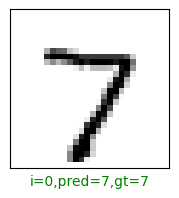

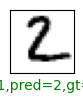

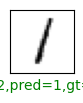

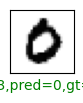

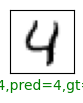

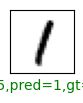

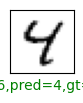

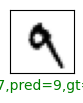

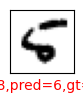

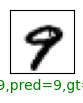

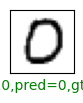

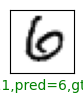

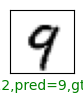

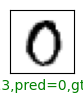

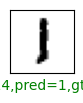

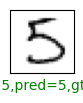

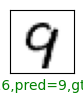

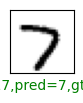

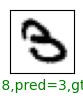

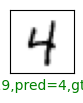

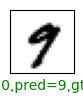

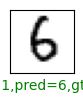

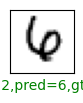

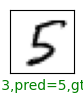

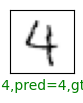

In [19]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred= np.argmax(preds[start_index+i])
    gt= y_test[start_index+i]
    col='g'
    if pred!=gt:
        col='r'

    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
    plt.show()

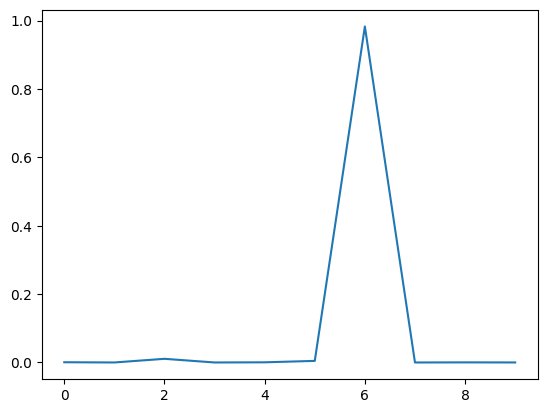

In [20]:
plt.plot(preds[8])
plt.show()

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [25]:
model.save("digit_recognition_model.keras")


